# APS - Pesquisa, ordenação e técnicas de armazenamento

## Env Settings

In [1]:
INT_RANGE = (0, 999)
LIST_SIZE = 10000

## Aux Functions

### getrandomlist()

In [2]:
from random import randrange

def getrandomlist(list_size):
    return [randrange(*INT_RANGE) for i in range(list_size)]

### elapsedtime()

In [3]:
from time import perf_counter_ns
from typing import Callable

def elapsedtime(func: Callable, *args, **kwargs):
    """
    Measures the elapsed time taken by a function to execute.

    Args:
        func: The function to be timed.

    Returns:
        The elapsed time in milliseconds as a float.
    """
    start_time = perf_counter_ns()
    func(*args, **kwargs)
    end_time = perf_counter_ns()
    elapsed_time = (end_time - start_time) / 1000000

    return elapsed_time

### generate_random_lists()

In [4]:
import numpy as np

def generate_random_lists(list_size, total_lists, min_val=0, max_val=9999):
    """
    Generates a list of lists containing random whole numbers using numpy for efficiency.
    
    Parameters:
    - list_size: The size of each list.
    - total_lists: The total number of lists to be created.
    - min_val: Minimum value for random numbers (inclusive).
    - max_val: Maximum value for random numbers (exclusive).
    
    Returns:
    A list of lists, each containing random whole numbers.
    """
    # Generate all numbers at once for efficiency, then reshape and convert to lists
    rng = np.random.default_rng()
    random_numbers = rng.integers(low=min_val, high=max_val, size=(total_lists, list_size), endpoint=True)
    return random_numbers.tolist()

### sort_lists()

In [5]:
from typing import Callable

def sort_lists(alg: Callable, data: list[list[int]], comparison_mode=False):
    """
    Sorts multiple lists using a specified sorting algorithm function.

    This function takes a sorting algorithm and a list of lists. Each inner list is sorted in-place
    using the provided algorithm. If comparison_mode is enabled, the function returns the total number
    of comparisons made across all lists.

    Parameters:
    - alg (Callable): A sorting algorithm function that accepts a list and a comparison_mode flag.
                      The function should sort the list in-place and optionally return the number of
                      comparisons made if comparison_mode is True.
    - data (list[list[int]]): A list of lists of integers to be sorted.
    - comparison_mode (bool, optional): A flag to enable counting of comparisons instead of sorting.
                                        Defaults to False.

    Returns:
    - None if comparison_mode is False. Each list in 'data' is sorted in-place.
    - int: The total number of comparisons made across all lists if comparison_mode is True.
    """
    # Assign data to lists so there is no chance to modify the original data
    lists = [*data]
    if not comparison_mode:
        for el in lists:
            alg(el, comparison_mode=comparison_mode)

    elif alg.__name__ == 'merge_sort':
        comparisons = 0
        for el in lists:
            comparisons += alg(el, comparison_mode=comparison_mode)[1]
        
        return comparisons

    else:
        comparisons = 0
        for el in lists:
            comparisons += alg(el, comparison_mode=comparison_mode)
        
        return comparisons

### get_average_sorting_time()

In [6]:
from typing import Callable
def get_average_sorting_time(alg: Callable, data: list[list[int]]):
    total_time = elapsedtime(sort_lists, alg, data)
    average_time = total_time/len(data)
    return average_time

### get_average_comparisons()

In [7]:
from typing import Callable
def get_average_comparisons(alg: Callable, data: list[list[int]]):
    comparisons = sort_lists(alg, data, comparison_mode=True)
    average_comparisons = comparisons/len(data)
    return average_comparisons

### generate_graph()

In [26]:
import matplotlib.pyplot as plt

def plot_bar_graph(data, title):
    """
    Plots a bar graph based on a list of objects with labels and values.
    
    Parameters:
    - data: A list of objects, where each object has 'label' and 'value' attributes.
    - title: The title of the graph.
    """
    # Extracting labels and values from the data
    labels = [item['algorithm'] for item in data]
    values = [item['average_comparisons'] for item in data]
    
    # Creating the bar graph
    plt.figure(figsize=(12, 6))  # Adjusts the size of the graph
    plt.bar(labels, values, color='#4472C4')
    
    # Adding the title and labels
    plt.title(title)
    
    
    # Optional: Adding value labels on top of each bar
    for i, value in enumerate(values):
        plt.text(i, value/2, value, ha='center', color="black")
    
    plt.savefig("./images/test.png")
    # Displaying the graph
    plt.show()

# Example usage
# data = [
#     {'algorithm': 'BbbuleSort', 'average_time': 23.5},
#     {'algorithm': 'Selection SOrt', 'average_time': 45.2},
#     {'algorithm': 'Insertion SOrt', 'average_time': 12.7},
#     {'algorithm': 'Heap Sort', 'average_time': 12.7},
#     {'algorithm': 'Merge Sort', 'average_time': 12.7},
#     {'algorithm': 'Quick SOrt', 'average_time': 10},
#     {'algorithm': 'Bucket Sort', 'average_time': 29.8}
# ]

# plot_bar_graph(data, 'Sample Bar Graph')

## Sorting Algotithms

*OBS: Não precisa fazer o Bucket Sort*

### Bubble Sort

In [9]:
def bubble_sort(array: list, comparison_mode=False):
    n = len(array)
    sorted_array = [*array]
    swaped = True
    comparisons = 0  # Initialize comparison counter

    while swaped:
        swaped = False
    
        for i in range(1, n):
            comparisons += 1  # Increment comparisons for each comparison made
            if sorted_array[i-1] > sorted_array[i]:
                temp = sorted_array[i-1]
                sorted_array[i-1] = sorted_array[i]
                sorted_array[i] = temp
                swaped = True
        
        n = n - 1
    
    if comparison_mode:
        return comparisons  # Return the total number of comparisons
    else:
        return sorted_array  # Return the sorted data

# Example usage
# data = [64, 25, 12, 22, 11]
# comparison_count = bubble_sort(data, comparison_mode=True)
# print(f"Number of comparisons: {comparison_count}")

### Selection Sort

In [10]:
def selection_sort(array: list, comparison_mode=False):
    """
    Sorts a list in ascending order using selection sort algorithm.
    Can also return the number of comparisons made if comparison_mode is True.

    Args:
        array: A list of sortable elements.
        comparison_mode: A boolean flag to return comparisons count instead of sorted data.

    Returns:
        A new list containing the sorted data or the number of comparisons made.
    """
    sorted_data = [*array]
    comparisons = 0  # Initialize comparison counter
    for i in range(len(sorted_data) - 1):
        min_index = i

        for j in range(i + 1, len(sorted_data)):
            comparisons += 1  # Increment comparisons for each comparison made
            if sorted_data[j] < sorted_data[min_index]:
                min_index = j

        if i != min_index:
            sorted_data[i], sorted_data[min_index] = sorted_data[min_index], sorted_data[i]

    if comparison_mode:
        return comparisons  # Return the total number of comparisons
    else:
        return sorted_data  # Return the sorted data

# Example usage
# data = [64, 25, 12, 22, 11]
# comparison_count = selection_sort(data, comparison_mode=True)
# print(f"Number of comparisons: {comparison_count}")



### Insertion Sort

In [11]:
def insertion_sort(data:list, comparison_mode=False):
    """
    Sorts a list in ascending order using insertion sort algorithm.
    Can also return the number of comparisons made if comparison_mode is True.

    Args:
        data: A list of sortable elements.
        comparison_mode: A boolean flag to return comparisons count instead of sorted data.

    Returns:
        A new list containing the sorted data or the number of comparisons made.
    """
    sorted_array = [*data]
    comparisons = 0  # Initialize comparison counter
    
    for i in range(1, len(data)):
        current_element = sorted_array[i]
        j = i

        while j > 0:
            comparisons += 1  # Increment comparisons for each comparison made
            if sorted_array[j - 1] > current_element:
                sorted_array[j - 1], sorted_array[j] = sorted_array[j], sorted_array[j-1]
                j -= 1
            else:
                break  # Exit the loop if no swap is needed

    if comparison_mode:
        return comparisons  # Return the total number of comparisons
    else:
        return sorted_array  # Return the sorted data

# Example usage
# data = [5, 2, 4, 6, 1, 3]
# comparison_count = insertion_sort(data, comparison_mode=True)
# print(f"Number of comparisons: {comparison_count}")

### Heap Sort

In [12]:
def heap_sort(data, comparison_mode=False):
  """
  Sorts a list of data in ascending order using heap sort algorithm.
  Can also return the number of comparisons made if comparison_mode is True.

  Args:
      data: A list of sortable elements.
      comparison_mode: A boolean flag to return comparisons count instead of sorted data.

  Returns:
      A new list containing the sorted data or the number of comparisons made.
  """
  sorted_data = [*data]
  comparisons = 0  # Initialize comparison counter

  heap_size = len(sorted_data)
  for i in range(heap_size // 2 - 1, -1, -1):
    heapify_result = heapify(sorted_data, heap_size, i, comparison_mode)
    if comparison_mode:
      comparisons += heapify_result

  for i in range(heap_size - 1, 0, -1):
    sorted_data[i], sorted_data[0] = sorted_data[0], sorted_data[i]
    heapify_result = heapify(sorted_data, i, 0, comparison_mode)
    if comparison_mode:
      comparisons += heapify_result

  if comparison_mode:
    return comparisons  # Return the total number of comparisons
  else:
    return sorted_data  # Return the sorted data

def heapify(data, heap_size, root_index, comparison_mode=False):
  """
  Maintains the max heap property of a subtree. Counts comparisons if required.

  Args:
      data: The list representing the heap.
      heap_size: The size of the heap (number of elements).
      root_index: The index of the root node.
      comparison_mode: A boolean flag to enable comparison counting.

  Returns:
      The number of comparisons made if comparison_mode is True, otherwise None.
  """
  largest = root_index
  left_child = 2 * root_index + 1
  right_child = 2 * root_index + 2
  comparisons = 0  # Initialize comparison counter

  if left_child < heap_size:
    comparisons += 1  # Increment comparisons
    if data[left_child] > data[largest]:
      largest = left_child

  if right_child < heap_size:
    comparisons += 1  # Increment comparisons
    if data[right_child] > data[largest]:
      largest = right_child

  if largest != root_index:
    data[largest], data[root_index] = data[root_index], data[largest]
    comparisons += heapify(data, heap_size, largest, comparison_mode)

  return comparisons if comparison_mode else None

# Example usage
# data = [5, 2, 4, 6, 1, 3]
# comparison_count = heap_sort(data, comparison_mode=True)
# print(f"Number of comparisons: {comparison_count}")

### Merge Sort

In [13]:
def merge_sort(data, comparison_mode=False):
  """
  Sorts a list of data in ascending order using merge sort algorithm.

  Args:
      data: A list of sortable elements.
      comparison_mode: A flag indicating if comparison count should be tracked (default: False)

  Returns:
      A tuple containing the sorted data and the number of comparisons made (if comparison_mode is True)
      A new list containing the sorted data otherwise.
  """
  sorted_data = [*data]
  comparisons = 0  # Initialize comparison counter

  # Base case: If the list has 0 or 1 element, it's already sorted
  if len(sorted_data) <= 1:
    return sorted_data, comparisons

  # Divide the list into two halves
  mid = len(sorted_data) // 2
  left_half = sorted_data[:mid]
  right_half = sorted_data[mid:]

  # Sort the left and right halves recursively, track comparisons
  sorted_left, left_comparisons = merge_sort(left_half, comparison_mode=True)
  sorted_right, right_comparisons = merge_sort(right_half, comparison_mode=True)
  comparisons += left_comparisons + right_comparisons  # Combine comparisons from sub-sorts

  # Merge the sorted halves back together, track comparisons in merge
  merged_data, merge_comparisons = merge(sorted_left, sorted_right, comparison_mode=True)
  comparisons += merge_comparisons

  if comparison_mode:
    return merged_data, comparisons
  else:
    return merged_data

def merge(left, right, comparison_mode=False):
  """
  Merges two sorted lists into a single sorted list.

  Args:
      left: A sorted list.
      right: A sorted list.
      comparison_mode: A flag indicating if comparison count should be tracked (default: False)

  Returns:
      A tuple containing the merged and sorted elements and the number of comparisons made (if comparison_mode is True)
      A new list containing the merged and sorted elements otherwise.
  """
  merged_data = []
  comparisons = 0  # Initialize comparison counter for merge

  i = 0  # Index for left list
  j = 0  # Index for right list

  # Iterate until both lists are empty
  while i < len(left) and j < len(right):
    comparisons += 1  # Increment comparison count every time we compare elements
    if left[i] <= right[j]:
      merged_data.append(left[i])
      i += 1
    else:
      merged_data.append(right[j])
      j += 1

  # Append any remaining elements from the left or right list
  merged_data.extend(left[i:])
  merged_data.extend(right[j:])

  if comparison_mode:
    return merged_data, comparisons
  else:
    return merged_data
  
# Example usage
# data = [5, 2, 4, 6, 1, 3]
# comparison_count = merge_sort(data, comparison_mode=True)[1]
# print(f"Number of comparisons: {comparison_count}")


### Quick Sort

In [14]:
def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    comparisons = 0  # Initialize comparison counter

    for j in range(low, high):
        comparisons += 1  # Increment for each comparison
        if array[j] <= pivot:
            i = i + 1
            array[i], array[j] = array[j], array[i]
    array[i + 1], array[high] = array[high], array[i + 1]

    return i + 1, comparisons

def quick_sort(array, low=0, high=None, comparison_mode=False, comparisons=0):
    if high is None:
        high = len(array) - 1
        array = [*array]  # Create a copy of the array only in the first iteration

    if low < high:
        pi, local_comparisons = partition(array, low, high)
        comparisons += local_comparisons  # Accumulate comparisons
        comparisons = quick_sort(array, low, pi - 1, comparison_mode, comparisons)
        comparisons = quick_sort(array, pi + 1, high, comparison_mode, comparisons)

    if comparison_mode:
        return comparisons
    else:
        return array

### Count Sort

In [37]:
def count_sort(arr, comparison_mode=False):
    """
    Sorts a list of non-negative integers using count sort algorithm.

    Args:
        arr: A list of non-negative integers.

    Returns:
        A new list containing the sorted elements.
    """
    # Find the maximum element in the array
    max_element = max(arr)

    # Create a count array to store the frequency of each element
    count_arr = [0] * (max_element + 1)
    for element in arr:
        count_arr[element] += 1

    # Use the count array to build the sorted output
    sorted_arr = []
    for i in range(len(count_arr)):
        for j in range(count_arr[i]):
            sorted_arr.append(i)

    result = len(arr) - 1 if comparison_mode else sorted_arr
    return result

# Example usage
# data = [5, 2, 4, 6, 1, 3]
# comparison_count = count_sort(data, comparison_mode=True)
# print(f"Number of comparisons: {comparison_count}")

Number of comparisons: [1, 2, 3, 4, 5, 6]


### Radix Sort

In [16]:
def radix_sort(arr, comparison_mode=False):
  """
  Sorts a list of non-negative integers using radix sort algorithm.

  Args:
      arr: A list of non-negative integers.

  Returns:
      A new list containing the sorted elements.
  """
  arr = [*arr]
  # Find the maximum element to determine the number of significant digits
  max_element = max(arr)
  exp = 1  # Initialize the exponent for the place value

  # Sort by each digit position (least significant digit to most significant)
  while max_element // exp > 0:
    # Create count arrays to store digit frequencies (0-9)
    count_arr = [0] * 10

    # Distribute elements into count arrays based on their digit at the current place value
    for element in arr:
      digit = (element // exp) % 10  # Extract the digit at the current place value
      count_arr[digit] += 1

    # Modify the count array to store cumulative totals for stable sorting
    for i in range(1, 10):
      count_arr[i] += count_arr[i - 1]

    # Use the count arrays to collect elements back into the original array in sorted order
    output_arr = [0] * len(arr)  # Initialize output array
    i = len(arr) - 1  # Start from the last element
    j = 0  # Index for the output array

    while i >= 0:
      digit = (arr[i] // exp) % 10
      count_arr[digit] -= 1  # Decrement count for the current digit
      output_arr[count_arr[digit]] = arr[i]
      i -= 1
      j += 1

    # Copy the sorted elements back to the original array
    for i in range(len(arr)):
      arr[i] = output_arr[i]

    # Move to the next significant digit
    exp *= 10
    result = len(arr) - 1 if comparison_mode else arr
  return result

## Algorithms List

In [17]:
ALG_LIST = [bubble_sort, selection_sort, insertion_sort, heap_sort, merge_sort, quick_sort, count_sort, radix_sort]

# Main Code

## Média com lista de 5 elementos 

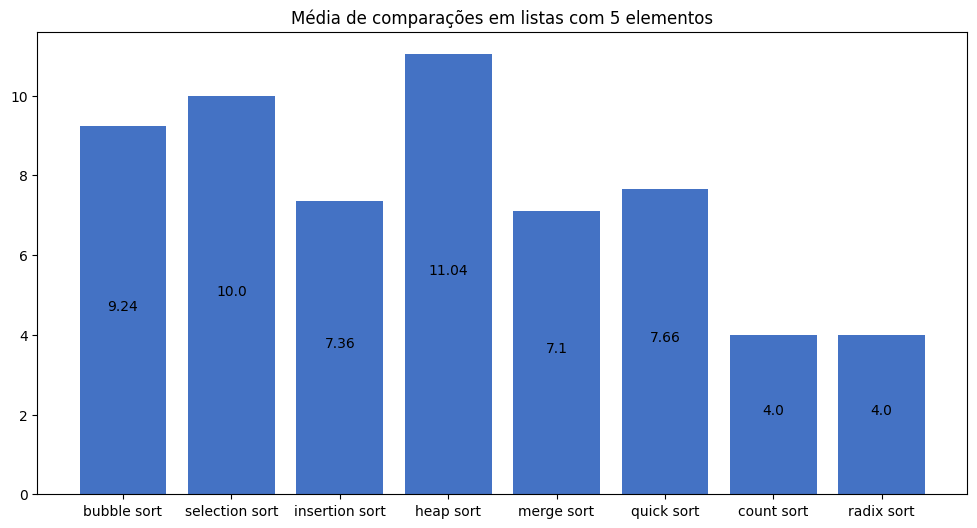

In [30]:
number_of_elements = 5
list_of_lists = generate_random_lists(number_of_elements, 50)
data = []
for alg in ALG_LIST:
    alg_data = {
        "algorithm": alg.__name__.replace("_"," "),
        "average_comparisons": float(format(get_average_comparisons(alg, list_of_lists), '.2f'))
    }
    data.append(alg_data)
plot_bar_graph(data, f"Média de comparações em listas com {number_of_elements} elementos")

## Média com lista de 10 elementos 

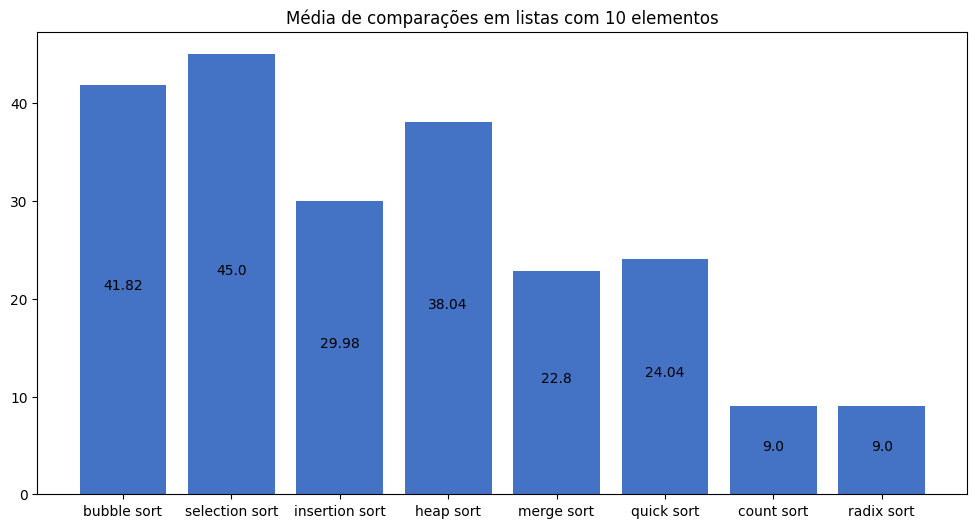

In [31]:
number_of_elements = 10
list_of_lists = generate_random_lists(number_of_elements, 50)
data = []
for alg in ALG_LIST:
    alg_data = {
        "algorithm": alg.__name__.replace("_"," "),
        "average_comparisons": float(format(get_average_comparisons(alg, list_of_lists), '.2f'))
    }
    data.append(alg_data)
plot_bar_graph(data, f"Média de comparações em listas com {number_of_elements} elementos")

## Média com lista de 50 elementos 

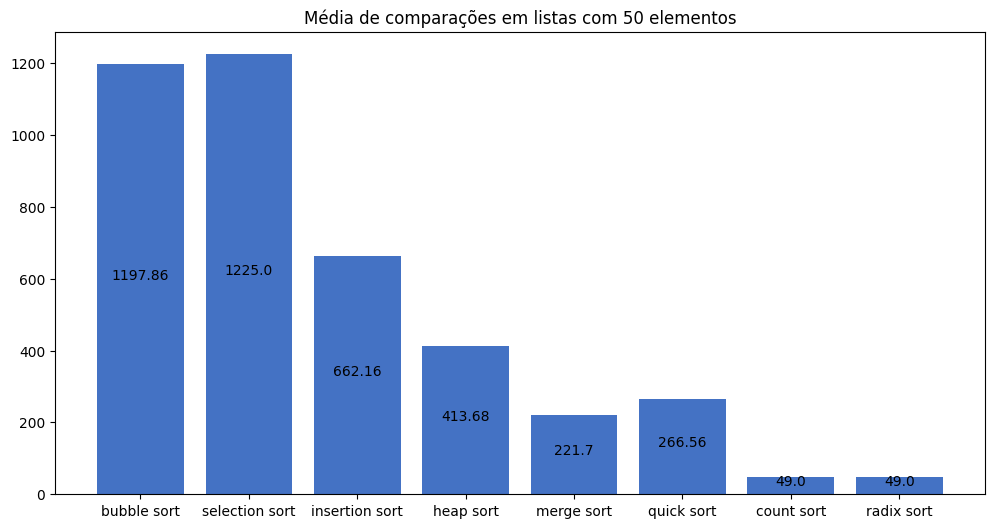

In [32]:
number_of_elements = 50
list_of_lists = generate_random_lists(number_of_elements, 50)
data = []
for alg in ALG_LIST:
    alg_data = {
        "algorithm": alg.__name__.replace("_"," "),
        "average_comparisons": float(format(get_average_comparisons(alg, list_of_lists), '.2f'))
    }
    data.append(alg_data)
plot_bar_graph(data, f"Média de comparações em listas com {number_of_elements} elementos")

## Média com lista de 100 elementos 

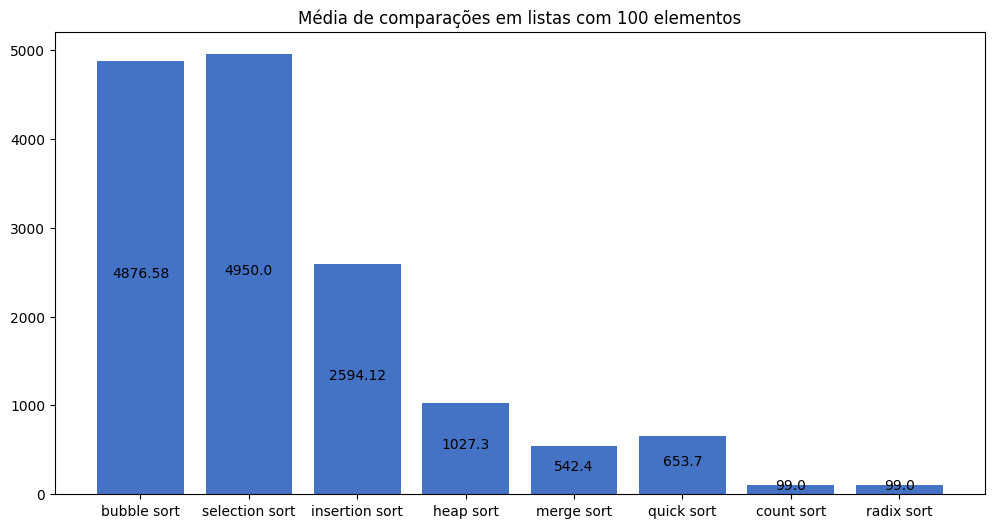

In [33]:
number_of_elements = 100
list_of_lists = generate_random_lists(number_of_elements, 50)
data = []
for alg in ALG_LIST:
    alg_data = {
        "algorithm": alg.__name__.replace("_"," "),
        "average_comparisons": float(format(get_average_comparisons(alg, list_of_lists), '.2f'))
    }
    data.append(alg_data)
plot_bar_graph(data, f"Média de comparações em listas com {number_of_elements} elementos")

## Média com lista de 1000 elementos 

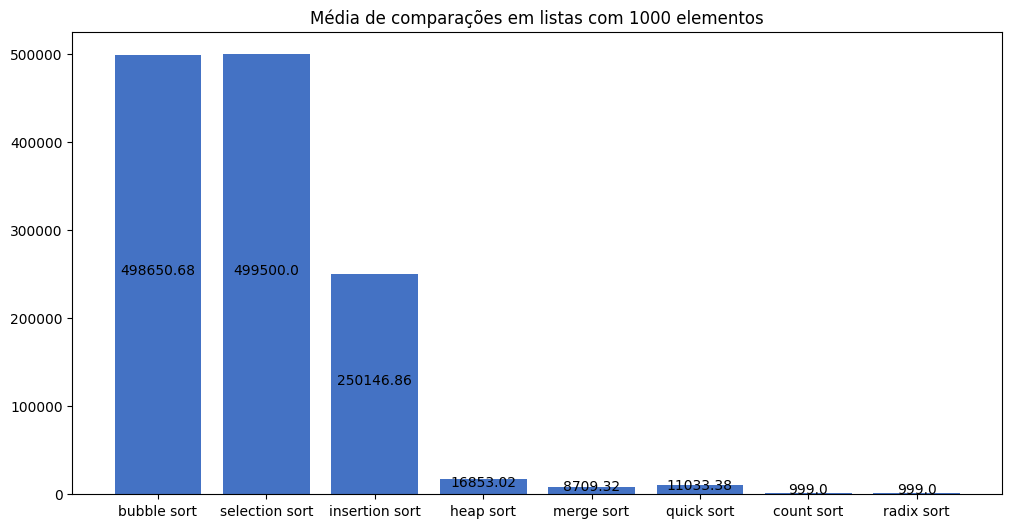

In [34]:
number_of_elements = 1000
list_of_lists = generate_random_lists(number_of_elements, 50)
data = []
for alg in ALG_LIST:
    alg_data = {
        "algorithm": alg.__name__.replace("_"," "),
        "average_comparisons": float(format(get_average_comparisons(alg, list_of_lists), '.2f'))
    }
    data.append(alg_data)
plot_bar_graph(data, f"Média de comparações em listas com {number_of_elements} elementos")

## Média com lista de 10000 elementos 

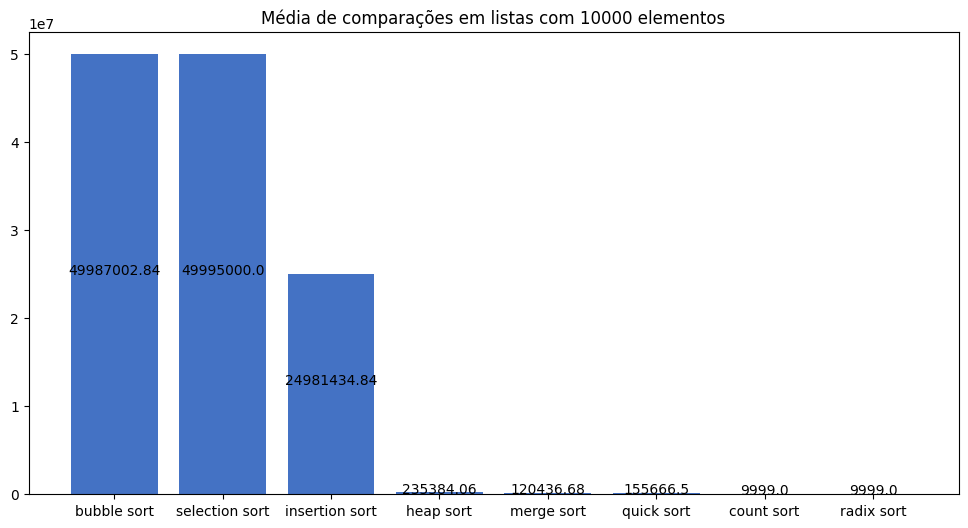

In [35]:
number_of_elements = 10000
list_of_lists = generate_random_lists(number_of_elements, 50)
data = []
for alg in ALG_LIST:
    alg_data = {
        "algorithm": alg.__name__.replace("_"," "),
        "average_comparisons": float(format(get_average_comparisons(alg, list_of_lists), '.2f'))
    }
    data.append(alg_data)
plot_bar_graph(data, f"Média de comparações em listas com {number_of_elements} elementos")